### Drawing at random with replacement from a box of numbered tickets

In [1]:
import numpy as np

In [2]:
items = np.array([ 0, 2, 3, 4, 6 ])
num_draws = 25

### Expected value

In [3]:
exp_value_1_draw = items.mean()
exp_value_1_draw

3.0

In [4]:
exp_value_total = exp_value_1_draw * num_draws
exp_value_total

75.0

### Standard Error

In [5]:
std_err = np.sqrt(num_draws) * np.std(items)
std_err

10.0

### Simulation

In [6]:
num_repetitions = 100000

In [7]:
result = []

for r in range(0, num_repetitions):
    sum = 0
    for d in range(0, num_draws):
        sum += np.random.choice(items)
    result.append(sum)

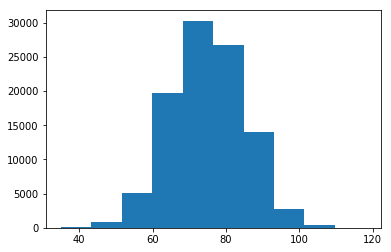

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(result)
plt.show()

### Discussion

In [9]:
draw_min = np.min(items) * num_draws
draw_min

0

In [10]:
draw_max = np.max(items) * num_draws
draw_max

150

Most results are within 2 or 3 SEs

In [11]:
print('2 [{}, {}]'.format(75 - 2 * std_err, 75 + 2 * std_err))
print('3 [{}, {}]'.format(75 - 3 * std_err, 75 + 3 * std_err))

2 [55.0, 95.0]
3 [45.0, 105.0]


#### Find probability samples are between arbitrary values, e.g. 50 and 100

First calculate z score

In [12]:
z50  = ( 50 - exp_value_total) / std_err
z100 = (100 - exp_value_total) / std_err

In [13]:
z50, z100

(-2.5, 2.5)

Percentage of values within 50 and 100

In [14]:
import scipy.stats as st

st.norm.cdf(z100) - st.norm.cdf(z50)

0.9875806693484477

In [15]:
result = np.array(result)

How many of our random samples were actually in the 99% range?

In [16]:
len(np.where((result >= 50) & (result <= 100))[0]) / num_repetitions

0.98971

#### How many of our samples are in the 95% range?

In [17]:
z1, z2 = st.norm.ppf([0.025, 0.975])
print(z1, z2)

-1.9599639845400545 1.959963984540054


z = (x - mean(x)) / SD

x = (z * SD) + mean(x)

In [18]:
x1, x2 = ((z1*std_err)+exp_value_total, (z2*std_err)+exp_value_total)
print(x1, x2)

55.400360154599454 94.59963984540053


In [19]:
len(np.where((result >= x1) & (result <= x2))[0]) / num_repetitions

0.95083

#### How many of our samples are in the 68% range?

In [20]:
z1, z2 = st.norm.ppf([0.16, 0.84])
print(z1, z2)

-0.994457883209753 0.994457883209753


z = (x - mean(x)) / SD

x = (z * SD) + mean(x)

In [21]:
x1, x2 = ((z1*std_err)+exp_value_total, (z2*std_err)+exp_value_total)
print(x1, x2)

65.05542116790247 84.94457883209753


In [22]:
len(np.where((result >= x1) & (result <= x2))[0]) / num_repetitions

0.65878

or more accurately ...

In [23]:
z1 = -1
z2 = 1

In [24]:
x1, x2 = ((z1*std_err)+exp_value_total, (z2*std_err)+exp_value_total)
print(x1, x2)

65.0 85.0


In [25]:
len(np.where((result >= x1) & (result <= x2))[0]) / num_repetitions

0.70802

hmm, with a huge number of repetitions why isn't tihs 68%? rounding errors?